### Задание
Заданы координаты точек на плоскости. Вывести их, включая исходные номера, в порядке, образующем произвольный многоугольник с непересекающимися сторонами.

In [30]:
import random
from copy import deepcopy

In [31]:
# Пользователь вводит количество точек, точки рандомно генерируются в сетке от -100 до 100

def dots_generation(n):
    return [[random.uniform(-100,100), random.uniform(-100,100)] for i in range(n)] 

In [32]:
#Находим нужный порядок

def sort_polygon(coords):
    coords.sort() # сортируем изначальный список точек по х - так мы найдем две самые левые точки, которые будут основой
    new, work = coords[:2], coords[2:] # две точки выводим в основу (в которой будем строить новый список-многоугольник) и в рабочий список
    for dot in work: #берем неизвестную точку
        #print('-----------')
        '''
        ОБЩИЙ АЛГОРИТМ
        1. предполагаем, что новая точка стоит между первой и последней в списке -> 
        значит, она находится по одну сторону от всех остальных прямых вместе с первой 
        и поседней точками  
        2. проверяем:  
            2.1. входим в цикл - на каждой итерации берем 2 точки из списка-базы 
            (в порядке предположительного многоугольника), строим уравнение прямой по этим точкам   
            2.2. в уравнение прямой подставляем координаты новой точки, первой и последней 
            и сверяем знаки + заводим flag=False, который будет сигнализировать 
            об обнаруженном пересечении:
                 * если у новой точки знак отличается от знаков начала/конца, 
                 вставляем ее между теми точками, какую прямую пересекает (по индексу)
                 * выходим из цикла + flag to True сигнализирует о пересечении
     
        3. После цикла - если flag==False, т.е. никакого пересечения не было, 
        значит, точку ставим в конец списка-базы
        '''
        for ind in range(len(new)-1):
            #print("***")
            #print(new)
            A = new[ind]
            B = new[ind+1]
            flag=False #берем 2 точки из предварительного списка-базы, заводим флаг

            #print("прямая: ", A, B)

            a = (B[1] - A[1])/(A[0] - B[0])
            c = - B[1] - B[0] * a # находим уравнение прямой для этих двух точек - одна из предположительных граней многоугольника

            #print("Уравнение: %.2f*x + y + %.2f = 0" % (a, c))     

            #print("рабочие точки: ", dot)
 
            check1 = a*dot[0] + dot[1] + c 
            check2 = a*new[0][0] + new[0][1] + c
            check3 = a*new[-1][0] + new[-1][1] + c #подставляем новую точку, начало "многоугольника" и конец в уравнение прямой, чтобы посмотреть их позицию относительно активной грани

            #print("результаты по точкам: ", [check1, check2, check3])

            non_zero = [i for i in [check1, check2, check3] if i!=0] #так как активной может быть грань, которой принадлежит или начало, или конец, тогда уравнение прямой == 0, и этот ноль мы можем убрать, так как он ни а что не влияет

            if all(num>0 for num in non_zero) or all(num<0 for num in non_zero): #если у все трех (двух в случае выше) знаки одинаковые, значит, они все по одну сторону от прямой, и если мы соединим эти три точки, то активную грань не пересечем. Ничего не делаем
                pass
            else:
                flag=True
                new.insert(ind+1, dot) #но если хоть один знак отличается, значит, мы не можем сделать грани из этих точек, так как одна из граней будет пересекать активную. Тогда разбиваем активную грань на две по новой точке (вставляем между двумя вершинами грани), меняем флаг и выходим из цикла, так как уже нашли место для новой точки
                #print('Знаки отличаются, точку поставили всередину')
                break
        if flag==False:
            new.append(dot) # если мы проверили все грани, и ни одного пересечения не было, вставляем новую точку в конец списка-базы и делаем ее новым концом 
              
    return new

In [33]:
#восстанавливаем номера точек в изначальном списке по индексу, соединяем с новым порядком

def sorce_indexes_restore(old_order, new_order): 
    return [[k, old_order.index(k)] for k in new_order]  

In [34]:
#строим многоугольник, соединяя точки в новом порядке, чтобы наглядно проверить, не оказалось ли там пересечений

def check_plotting(new): 
    import matplotlib.patches as patches
    import pylab

    pylab.scatter([x[0] for x in new], [y[1] for y in new])
    pylab.gca().add_patch(patches.Polygon(new, closed=True, fill=False))
    pylab.grid()
    pylab.show()
    
    return "See the plot"

In [35]:
def task_full(): #собираем все функции

    n = int(input("Введите количество точек: "))

    while n<3: #проверяем, чтобы было введено не менее 3 точек, и генерируем только от трех
        print("Невозможно составить многоугольник меньше чем из трех точек. Попробуйте еще раз")
        n = int(input("Введите количество точек: "))
    else:
        coords=dots_generation(n)
        print("Сгенериованные точки: ", coords)
        
    old_order = deepcopy(coords) #создаем независимую копию оригинального списка, чтобы потом восстановить исходные индексы
    if n>3: #Если введены три точки, то не нужно применять алгоритм сортировки - треугольник по трем точкам можно собрать в любом порядке, и пересечения не будет
        new = sort_polygon(coords)
    else:
        new = deepcopy(coords)
    final = sorce_indexes_restore(old_order, new)
    print("Новый порядок (с сохранением старого индекса в скобках):")
    for el in final:
        print("\t" + str(el[0]) + ' (old number is ' + str(el[1]+1) + ') ' )
        
    check_plotting(new)
    
    return "Finish"

Введите количество тестов: 3
Выполняем тест №1
Введите количество точек: 3
Сгенериованные точки:  [[61.60512710247218, -18.891091244809814], [3.381441694205847, -74.00242020564798], [76.14936908007846, -91.38521805870177]]
Новый порядок (с сохранением старого индекса в скобках):
	[61.60512710247218, -18.891091244809814] (old number is 1) 
	[3.381441694205847, -74.00242020564798] (old number is 2) 
	[76.14936908007846, -91.38521805870177] (old number is 3) 


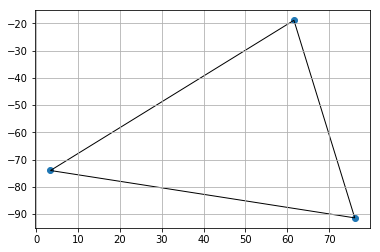

Finish
Тест завершен
---------------
Выполняем тест №2
Введите количество точек: 5
Сгенериованные точки:  [[-94.30317807127142, 53.35724229288212], [-19.15231012209135, 97.367137569476], [42.97156195486588, -3.6114535570107336], [-73.44887246881757, -60.24672519767651], [39.1348444967181, -89.29882177396581]]
Новый порядок (с сохранением старого индекса в скобках):
	[-94.30317807127142, 53.35724229288212] (old number is 1) 
	[-73.44887246881757, -60.24672519767651] (old number is 4) 
	[39.1348444967181, -89.29882177396581] (old number is 5) 
	[42.97156195486588, -3.6114535570107336] (old number is 3) 
	[-19.15231012209135, 97.367137569476] (old number is 2) 


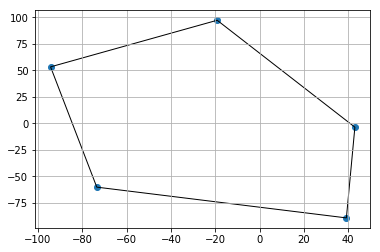

Finish
Тест завершен
---------------
Выполняем тест №3
Введите количество точек: 21
Сгенериованные точки:  [[93.50554676663995, -3.8900856706254956], [-36.71366736861916, -20.913954894274966], [-71.33323158140168, 94.3238230861462], [17.920737725030307, 70.29405328183418], [7.202458620149017, -31.54114930435152], [-37.83351403236557, -99.89904116500219], [28.49894395025231, -71.28179182804391], [99.14274947446572, -24.254345355259986], [85.04381509526971, 35.89788904449273], [70.06945819249458, 92.18044838479787], [41.17368354451696, 28.495098595891108], [26.471530646207242, -89.38672745274441], [30.347347412306448, -90.07029436187645], [-76.27085457579412, 49.63033798294981], [-62.08956756262731, -75.2839672816193], [0.9837606195035988, 12.797043429046127], [81.16137940743627, -30.782986294593456], [-37.46157553357201, -93.21110471433501], [-66.2381215755479, -72.87062897760386], [24.335941561567935, 80.31455987990071], [46.98087563004535, -71.4071002708691]]
Новый порядок (с сохранен

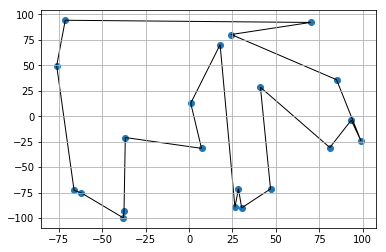

Finish
Тест завершен
---------------


In [36]:
#тесты

test_num = int(input("Введите количество тестов: "))
for i in range(test_num):
    print("Выполняем тест №" + str(i+1))
    print(task_full())
    print("Тест завершен\n---------------")